In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
source_df = pd.read_csv('../csvs/pima-indians-diabetes.csv', names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'])
source_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df = source_df.drop(['Class'], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [5]:
X = df.values

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 

In [7]:
df["Clus_km"] = labels
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clus_km
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0


In [8]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].map(lambda x: '%.3f' % x)
df.to_csv("pima_kmeans_res.csv", index=False, header=False)

In [9]:
source_df['Clus_km'] = df["Clus_km"]
source_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Clus_km
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,1


In [10]:
source_df['eq'] = np.where(source_df["Class"] == source_df["Clus_km"], True, False)
source_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Clus_km,eq
0,6,148,72,35,0,33.6,0.627,50,1,1,True
1,1,85,66,29,0,26.6,0.351,31,0,1,False
2,8,183,64,0,0,23.3,0.672,32,1,1,True
3,1,89,66,23,94,28.1,0.167,21,0,1,False
4,0,137,40,35,168,43.1,2.288,33,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,True
764,2,122,70,27,0,36.8,0.340,27,0,1,False
765,5,121,72,23,112,26.2,0.245,30,0,1,False
766,1,126,60,0,0,30.1,0.349,47,1,1,True


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'DiabetesPedigreeFunction')

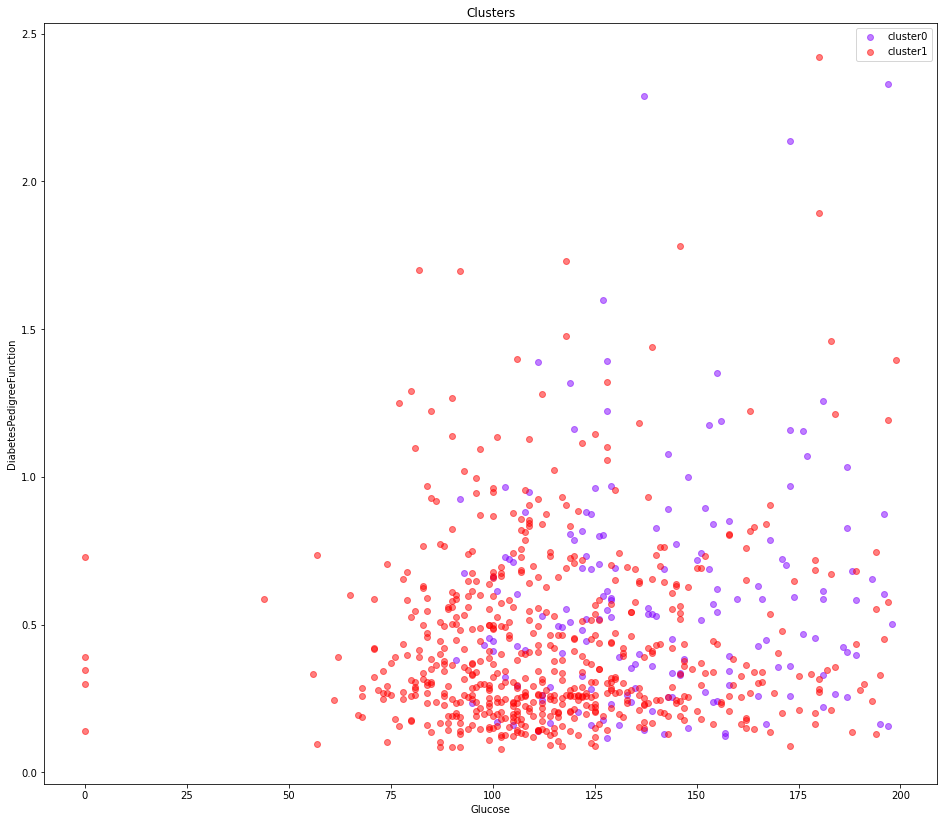

In [11]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

n_clusters = max(labels)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = source_df[source_df.Clus_km == label]
    plt.scatter(subset.Glucose, subset.DiabetesPedigreeFunction, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Glucose')
plt.ylabel('DiabetesPedigreeFunction')

In [12]:
cluster_list = [i for i in range (2, 11)]
scores = []

for i in range(2, 11):
    k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_avg = silhouette_score(X, labels)
    scores.append(silhouette_avg)
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

silhoutte score for n_clusters = 2 is 0.5687897205830247
silhoutte score for n_clusters = 3 is 0.5104287492214447
silhoutte score for n_clusters = 4 is 0.425157227030241
silhoutte score for n_clusters = 5 is 0.3969180143549049
silhoutte score for n_clusters = 6 is 0.3286987163237079
silhoutte score for n_clusters = 7 is 0.33399093210436887
silhoutte score for n_clusters = 8 is 0.3573884505238865
silhoutte score for n_clusters = 9 is 0.34004200442690086
silhoutte score for n_clusters = 10 is 0.2874037181336486


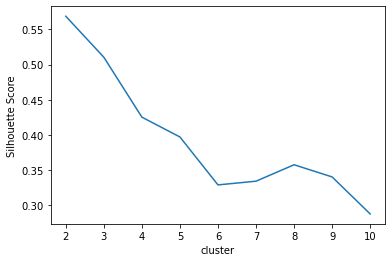

In [13]:
plt.plot(cluster_list, scores)
plt.xlabel('cluster')
plt.ylabel('Silhouette Score')
plt.show()